# <center>Bibliotecas utilizadas</center>

In [1]:
from efficient_kan import KAN

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from sklearn.metrics import *
from torch.utils.data import DataLoader

# <center>Pré-processamento dos dados</center>

In [2]:
train_path = 'Dataset/train'
test_path = 'Dataset/test'

In [3]:
transform = transforms.Compose(
    [transforms.Resize(size = (224,224)), 
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [4]:
train_dataset = datasets.ImageFolder(train_path, transform = transform)
test_dataset = datasets.ImageFolder(test_path, transform = transform)

In [5]:
trainloader = DataLoader(train_dataset, batch_size = 30, shuffle = True)
testloader = DataLoader(test_dataset, batch_size = 90, shuffle = True)

# <center>Implementação da arquitetura *efficientKAN*</center>

In [6]:
model = KAN([224*224*3, 224, 64, 3])

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

KAN(
  (layers): ModuleList(
    (0-2): 3 x KANLinear(
      (base_activation): ReLU()
    )
  )
)

In [7]:
num_epoch = 30
learning_rate = 0.001

In [8]:
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

In [10]:
train_losses = []
train_acc = []

for epoch in range(num_epoch):
    model.train()
    running_train_loss = 0.0

    for inputs, labels in trainloader:
        inputs = inputs.view(-1, 224*224*3).to(device)
        labels = labels.to(device)
    
        optimizer.zero_grad()
        outputs = model(inputs)

        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()

    train_loss = running_train_loss / len(trainloader)
    train_losses.append(train_loss)

    _, predicted = torch.max(outputs.data, 1)
    acc = accuracy_score(labels, predicted)
    train_acc.append(acc)

    print(f"Época {epoch + 1}/{num_epoch} - Perda no treinamento: {train_loss:.6f} - Acurácia: {acc:.2f}")

Época 1/30 - Perda no treinamento: 3.669095 - Acurácia: 0.63
Época 2/30 - Perda no treinamento: 0.952023 - Acurácia: 0.83
Época 3/30 - Perda no treinamento: 0.531341 - Acurácia: 0.97
Época 4/30 - Perda no treinamento: 0.297353 - Acurácia: 1.00
Época 5/30 - Perda no treinamento: 0.126206 - Acurácia: 0.97
Época 6/30 - Perda no treinamento: 0.070277 - Acurácia: 0.97
Época 7/30 - Perda no treinamento: 0.042297 - Acurácia: 1.00
Época 8/30 - Perda no treinamento: 0.036567 - Acurácia: 1.00
Época 9/30 - Perda no treinamento: 0.034364 - Acurácia: 1.00
Época 10/30 - Perda no treinamento: 0.018237 - Acurácia: 1.00
Época 11/30 - Perda no treinamento: 0.011303 - Acurácia: 1.00
Época 12/30 - Perda no treinamento: 0.005114 - Acurácia: 1.00
Época 13/30 - Perda no treinamento: 0.004828 - Acurácia: 1.00
Época 14/30 - Perda no treinamento: 0.003191 - Acurácia: 1.00
Época 15/30 - Perda no treinamento: 0.002675 - Acurácia: 1.00
Época 16/30 - Perda no treinamento: 0.002083 - Acurácia: 1.00
Época 17/30 - Per

Text(0.5, 0.98, 'Treinamento')

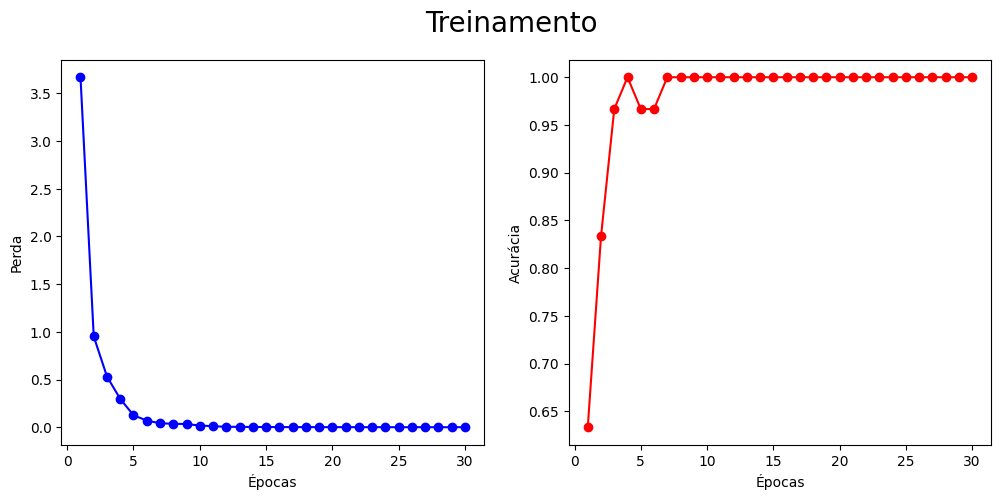

In [11]:
epochs = range(1, num_epoch + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'bo-')
plt.xlabel('Épocas')
plt.ylabel('Perda')

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'ro-')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')

plt.suptitle("Treinamento", fontsize = 20)

In [12]:
model.eval()
    
with torch.no_grad():
        
    for images, labels in testloader:
        images = images.view(-1, 224*224*3).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        acc = accuracy_score(labels, predicted)
        
print(f"Acurácia: {acc:.2f}")

Acurácia: 0.92


# <center>Métricas de avaliação</center>

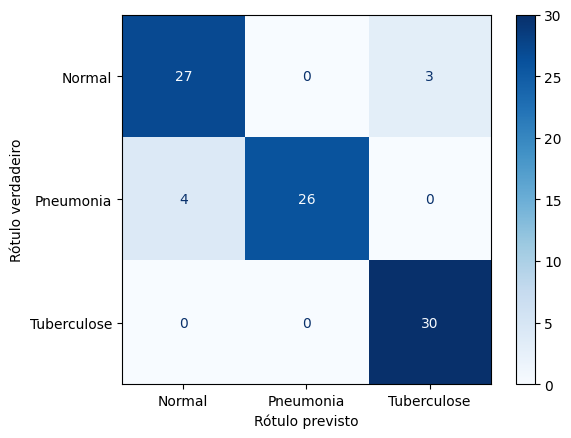

In [13]:
cm = confusion_matrix(labels, predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Pneumonia', 'Tuberculose'])
disp.plot(cmap=plt.cm.Blues)

plt.xlabel('Rótulo previsto')
plt.ylabel('Rótulo verdadeiro')
plt.show()

In [14]:
precision = precision_score(labels, predicted, average='weighted')
print(f"Precisão: {precision:.2f}")

Precisão: 0.93


In [15]:
recall = recall_score(labels, predicted, average='weighted')
print(f"Recall: {recall:.2f}")

Recall: 0.92


In [16]:
f1 = f1_score(labels, predicted, average='weighted')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.92
